In [1]:
%matplotlib notebook

import spinmob as sm
import matplotlib.pyplot as plt
import numpy as _n
import scipy.optimize as _opt

/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc", line #512
  (fname, cnt))
/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
E_x = sm.data.load()

Extra ckey: Height

loaded /home/qsimexpcontrol/Desktop/E_x.txt 



In [3]:
E_y = sm.data.load()

Extra ckey: Height

loaded /home/qsimexpcontrol/Desktop/E_y.txt 



In [4]:
E_z = sm.data.load()

Extra ckey: Height

loaded /home/qsimexpcontrol/Desktop/E_z.txt 



In [4]:
potential = sm.data.load()

Extra ckey: Height

loaded /home/qsimexpcontrol/Desktop/potential.txt 



<IPython.core.display.Javascript object>


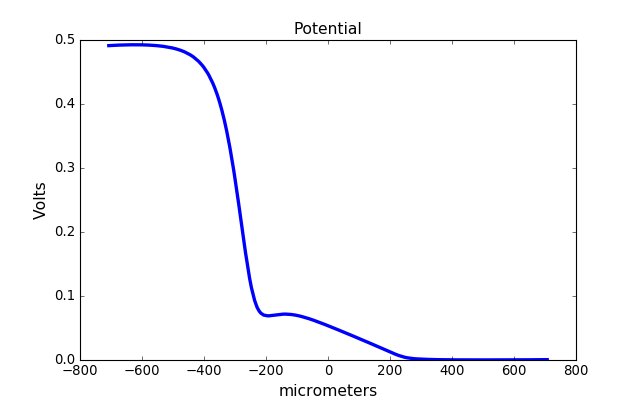

In [5]:
def plot_potential(databox):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    
    raw_position = databox[0]
    position_max = raw_position[-1]
    mid_position = position_max/2.
    x = raw_position - mid_position
    
    voltage = databox[1]
    
    fontsize=14
    ax.plot(x, voltage, linewidth=3.)
    ax.set_title('Potential', fontsize=fontsize)
    ax.set_ylabel('Volts', fontsize=fontsize)
    ax.set_xlabel('micrometers', fontsize=fontsize)


plot_potential(databox=potential)

<IPython.core.display.Javascript object>


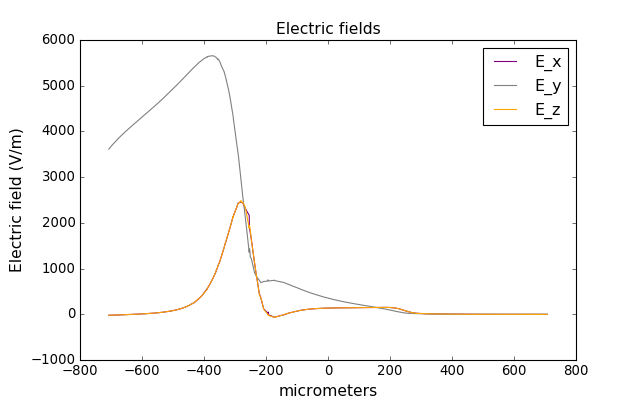

In [52]:
def plot_electric_fields(E_x, E_y, E_z):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    
    raw_position = E_x[0]
    position_max = raw_position[-1]
    mid_position = position_max/2.
    x = raw_position - mid_position
    
    x_field = E_x[1]
    y_field = E_y[1]
    z_field = E_z[1]
    
    fontsize = 14
    linewidth = 1
    ax.plot(x, x_field, linewidth=linewidth, label='E_x', color='purple')
    ax.plot(x, y_field, linewidth=linewidth, label='E_y', color='grey')
    ax.plot(x, z_field, linewidth=linewidth, label='E_z', color='orange')

    ax.set_title('Electric fields', fontsize=fontsize)
    ax.set_ylabel('Electric field (V/m)', fontsize=fontsize)
    ax.set_xlabel('micrometers', fontsize=fontsize)
    ax.legend()


plot_electric_fields(E_x, E_y, E_z)

In [ ]:
asdfjlaslkjfdlaskjdfjflkjdfslkjldjflsjkdjfjsdf

In [ ]:

def plot_electric_fields(E_x, E_y, E_z):
    #fig = plt.figure(figsize=(5, 5))
    #ax1 = plt.subplot
    plt.plot(databox[0], databox[1])
    plt.xlabel('anything')
    plt.show()

# Functions

# Three dimensional potential

In [29]:
class Potential(object):
    """
    Electric field potential generated from comsol data loaded as a spinmob databox.
    
    Lists are ordered.
    
    Attributes
    ----------
    self._x_positions: numpy array of x positions in micrometers
    self._y_positions ...
    self._potentials: numpy array of potentials in Volts
    """
    def __init__(self, potential_path=None):
        """
        Make sure data is loaded with a right-handed coordinate system.
        
        The column data in the comosol file has position and potential data.
        x position (micrometers): column 0
        y position (micrometers): column 1
        z position (micrometers): column 2
        potential (volts): column 3
        
        If databox is None spinmob will prompt you to open a databox.
        
        Parameters
        ----------
        potential_path: str, path to comsol data file, default(None).
        """
        self.potential_path = potential_path
        self._databox = sm.data.load(path=self.potential_path)
        self._set_positions_and_potential()
    
    def _set_positions_and_potential(self):
        self._x_positions = self._databox[0]
        self._y_positions = self._databox[1]
        self._z_positions = self._databox[2]
        self._potentials = self._databox[3]
    
    def _z_contour(self, z=0.):
        """
        Return a list of tuples of contour data at z level, where each tuple 
        consists of (x_position, y_position, potential).
        """
        target_indices = []
        for index in xrange(len(self._z_positions)):
            if self._z_positions[index] == z:
                target_indices.append(index)
        
        unsorted_contour_data = []
        for index in target_indices:
            x_position = self._x_positions[index]
            y_position = self._y_positions[index]
            potential = self._potentials[index]
            data_point = (x_position, y_position, potential)
            unsorted_contour_data.append(data_point)
        
        contour_data = sorted(unsorted_contour_data)
        return contour_data
    
    def plot_z_contour(self, z=0.):
        contour_data = self._z_contour(z=z)
        
        _potential = []
        for _tuple in contour_data:
            _potential.append(_tuple[-1])

        side_length = int(_n.sqrt(len(_potential)))
        potential_two_D = _n.array(_potential).reshape(side_length, side_length)

        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.imshow(potential_two_D)
        fig.colorbar(cax)        
    
    def positions_and_potentials_arrays(self):
        """
        Returns a 1D array of tuples of (x, y, z).
        
        Useful for fitting.
        """
        positions_tuple = (self._x_positions, self._y_positions,self._z_positions)        
        return positions_tuple, self._potentials
    

#potential = Potential(databox=comsol_data)

In [33]:
class ElectrodeMultipoleExpansion(object):
    """
    
    """
    def __init__(self, potential_path=None):
        """
        Parameters
        ----------
        potential: Potential instance for an electrode.
        """
        self.potential_path = potential_path
        self.potential = None
        self.multipole = Multipole()
        self._set_potential()
        self.fit_potential()
        
    def _set_potential(self):
        self.potential = Potential(potential_path=self.potential_path)

    def plot_z_contour_theory(self, z=0.):
        """
        Potential contour plot from the multipole fit coefficients.
        """
        length = 101
        edge = 50

        x = _n.linspace(-1*edge, edge, length)
        y = _n.linspace(-1*edge, edge, length)

        g_x, g_y = _n.meshgrid(x, y)
        contour_data = theory_contour(g_x, g_y, z, *self.popt)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.imshow(contour_data.reshape(101, 101))
        fig.colorbar(cax) 

    def fit_potential(self):
        """
        Fit the potential data and extract the multipole moments.
        """
        positions, potentials = self.potential.positions_and_potentials_arrays()
        initial_guess = (.1, .01, .01, .01, .001, .001, .001, .001, .001)
        popt, pcov = _opt.curve_fit(multipole_potential, positions, potentials, p0=initial_guess)
        # The multipole coefficients
        self.popt = popt
        self.pcov = pcov
        
        self._populate_multipole()
    
    def _populate_multipole(self):
        """
        Make the Multipole instance.
        """
        self.multipole.M_0 = self.popt[0]
        self.multipole.M_1 = self.popt[1]
        self.multipole.M_2 = self.popt[2]
        self.multipole.M_3 = self.popt[3]
        self.multipole.M_4 = self.popt[4]
        self.multipole.M_5 = self.popt[5]
        self.multipole.M_6 = self.popt[6]
        self.multipole.M_7 = self.popt[7]
        self.multipole.M_8 = self.popt[8]
    
    def get_column_for_multipole_array(self):
        """
        A piece of the big array that needs to be inverted.  A column from each electrode
        is needed.  This excludes the monopole moment term.
        
        Returns
        -------
        [M_1, M_2 etc.]
        """
        # Skips the first element which is the monopole coefficient.
        return self.popt[1:]
    
        
class Multipole(object):
    """
    Multipole expansion following the German diploma thesis.
    """
    
    def __init__(self):
        # Multipole expansion coefficients.
        # Monpole moment
        self.M_0 = None
        # Dipole moments
        self.M_1 = None
        self.M_2 = None
        self.M_3 = None
        # Quadrupole moments
        self.M_4 = None
        self.M_5 = None
        self.M_6 = None
        self.M_7 = None
        self.M_8 = None
    
    def potential_from_fitting(self, (x, y, z)):
        """
        """
        pass
        
        

def multipole_potential((x, y, z), M_0, M_1, M_2, M_3, M_4, M_5, M_6, M_7, M_8):
    """
    Electrostatic potential to 2nd order.
    
    Tuple with coordinates and then the moments of the expansion.
    """    
    monopole_moment = M_0
    dipole_moments = M_1*x + M_2*y + M_3*z
    quadrupole_1 = M_4*(x**2. - y**2.) + M_5*(2.*z**2. - x**2. - y**2.)
    quadrupole_2 = M_6*x*y + M_7*y*z + M_8*z*x
    quadrupole_moments = quadrupole_1 + quadrupole_2
    potential = monopole_moment + dipole_moments + quadrupole_moments
    return potential.ravel()


def theory_contour(x, y, z, M_0, M_1, M_2, M_3, M_4, M_5, M_6, M_7, M_8):
    value = multipole_potential((x, y, z), M_0, M_1, M_2, M_3, M_4, M_5, M_6, M_7, M_8)
    return value

## z-plus y-minus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_y_minus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


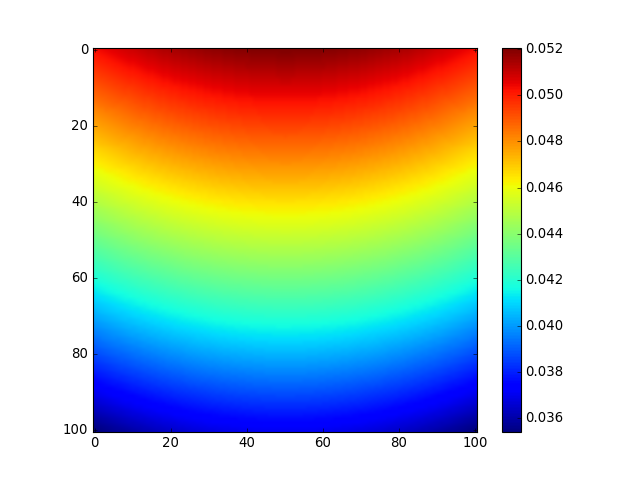

In [15]:
zp_ym_electrode = ElectrodeMultipoleExpansion()
zp_ym_electrode.fit_potential()
zp_ym_electrode.plot_z_contour_theory()

In [27]:
column = zp_ym_electrode.get_column_for_multipole_array()
column

array([  4.51184301e-02,  -2.37001250e-09,  -1.49422742e-04,
         3.26279239e-04,  -2.43882511e-07,   4.54486262e-07,
        -1.10681452e-10,  -1.57624079e-06,   3.16571162e-12])

In [28]:
column[1:]

array([ -2.37001250e-09,  -1.49422742e-04,   3.26279239e-04,
        -2.43882511e-07,   4.54486262e-07,  -1.10681452e-10,
        -1.57624079e-06,   3.16571162e-12])

In [25]:
zp_ym_electrode.multipole.M_0

0.045118430069348604

## z-plus x-minus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_x_minus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


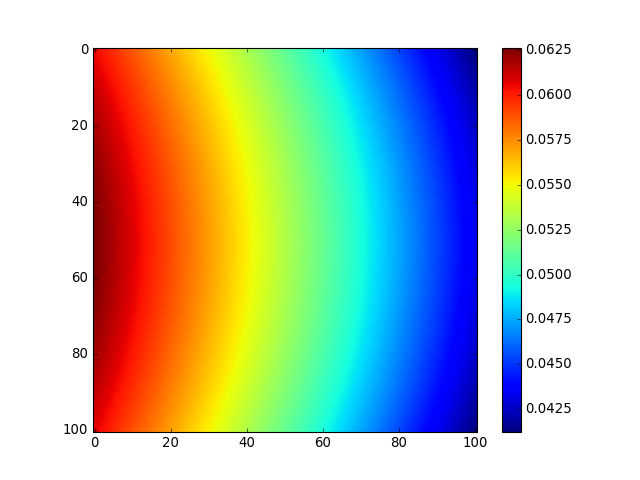

In [16]:
zp_xm_electrode = ElectrodeMultipoleExpansion()
zp_xm_electrode.fit_potential()
zp_xm_electrode.plot_z_contour_theory()

## z-plus y-plus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_y_plus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


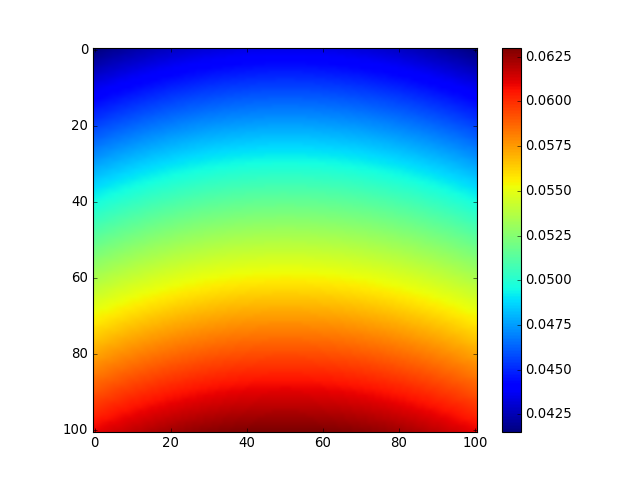

In [17]:
zp_yp_electrode = ElectrodeMultipoleExpansion()
zp_yp_electrode.fit_potential()
zp_yp_electrode.plot_z_contour_theory()

## z-plus x-plus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_x_plus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


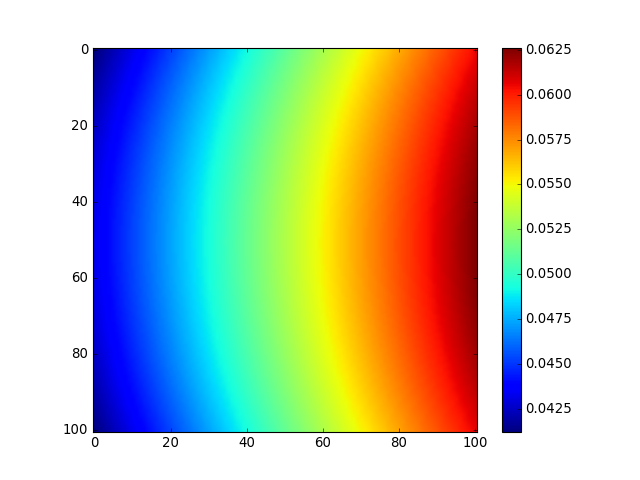

In [18]:
zp_xp_electrode = ElectrodeMultipoleExpansion()
zp_xp_electrode.fit_potential()
zp_xp_electrode.plot_z_contour_theory()

In [42]:
zp_xp_electrode.get_column_for_multipole_array()

array([  5.32742639e-02,   1.92817941e-04,   1.52663310e-06,
         3.52749781e-04,   3.45330860e-07,   4.73355966e-07,
         1.30388660e-08,   6.80355609e-09,   1.75353623e-06])

## z-minus y-minus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_minus_y_minus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


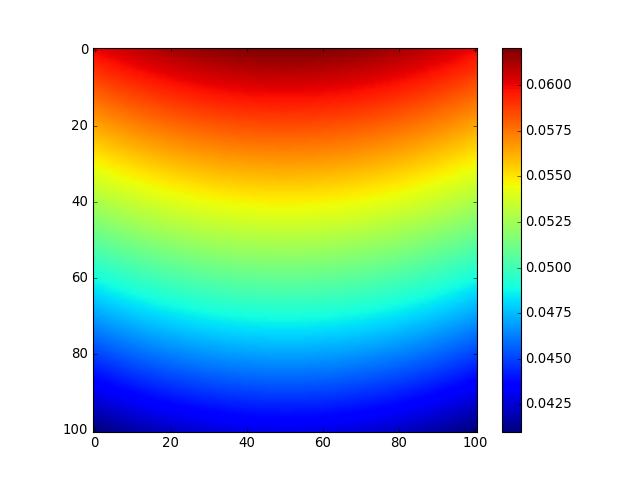

In [19]:
zm_ym_electrode = ElectrodeMultipoleExpansion()
zm_ym_electrode.fit_potential()
zm_ym_electrode.plot_z_contour_theory()

## z-minus x-minus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_minus_x_minus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


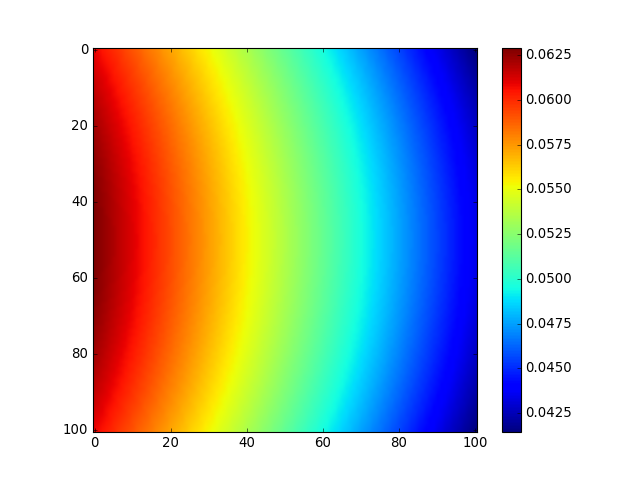

In [20]:
zm_xm_electrode = ElectrodeMultipoleExpansion()
zm_xm_electrode.fit_potential()
zm_xm_electrode.plot_z_contour_theory()

## z-minus y-plus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_minus_y_plus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


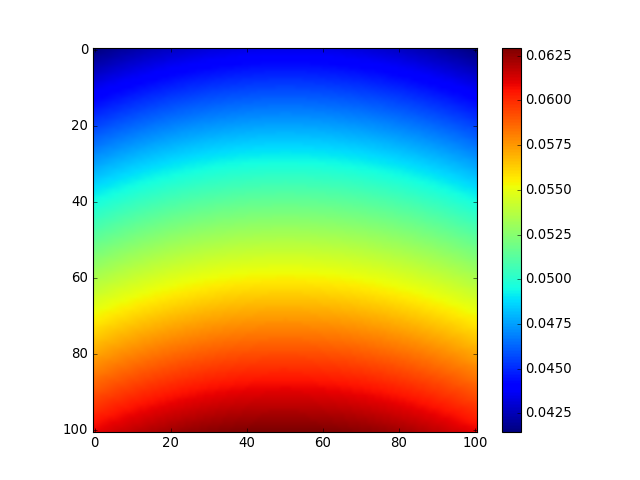

In [21]:
zm_yp_electrode = ElectrodeMultipoleExpansion()
zm_yp_electrode.fit_potential()
zm_yp_electrode.plot_z_contour_theory()

## z-minus x-plus electrode

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_minus_x_plus_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


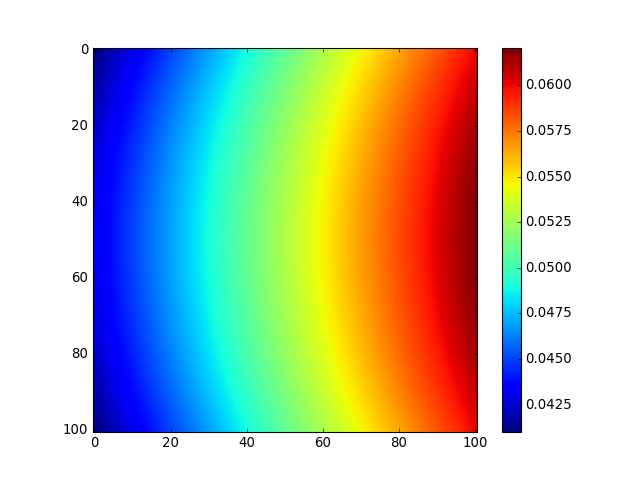

In [22]:
zm_xp_electrode = ElectrodeMultipoleExpansion()
zm_xp_electrode.fit_potential()
zm_xp_electrode.plot_z_contour_theory()

## ring electrode 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/ring_1V_others_grounded.txt 



<IPython.core.display.Javascript object>


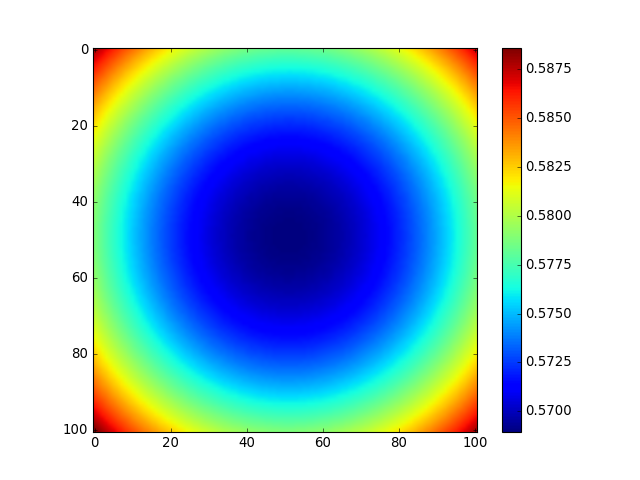

In [23]:
ring_electrode = ElectrodeMultipoleExpansion()
ring_electrode.fit_potential()
ring_electrode.plot_z_contour_theory()

## Multipole matrix 

In [46]:
class MultipoleMatrices(object):
    """
    The matrices (one is an inversion) that relate the multipole moments to the
    
    Attributes
    ----------
    _electrodes: list of imported electrodes.
    electrode_to_multipole_matrix: numpy array that converts electrode values to multipole values.
    multipole_to_electrode_matrix: numpy array that converts a desired multipole value to electrode voltages.
    """
    def __init__(self, e1, e2, e3, e4, e5, e6, e7, e8):
        # electrodes
        self._e1 = e1
        self._e2 = e2
        self._e3 = e3        
        self._e4 = e4        
        self._e5 = e5        
        self._e6 = e6        
        self._e7 = e7        
        self._e8 = e8        

        self._make_electrodes_list()
        self._populate_electrode_to_multipole_matrix()
        self._make_multipole_to_electrode_matrix()
    
    def _make_electrodes_list(self):
        self._electrodes = []
        self._electrodes.append(self._e1)
        self._electrodes.append(self._e2)
        self._electrodes.append(self._e3)
        self._electrodes.append(self._e4)
        self._electrodes.append(self._e5)
        self._electrodes.append(self._e6)
        self._electrodes.append(self._e7)
        self._electrodes.append(self._e8)

    def _column_tuple(self):
        """
        Return a tuple of columns to make the electrode to multipole moment matrix.
        """
        matrix_columns = []
        for electrode in self._electrodes:
            multipole_column = electrode.get_column_for_multipole_array()
            matrix_columns.append(multipole_column)
        return tuple(matrix_columns)
        
    def _populate_electrode_to_multipole_matrix(self):
        """
        This is the matrix that needs to be inverted.
        """
        column_tuple = self._column_tuple()
        self.electrode_to_multipole_matrix = _n.column_stack(column_tuple)
    
    def _make_multipole_to_electrode_matrix(self):
        self.multipole_to_electrode_matrix = _n.linalg.inv(self.electrode_to_multipole_matrix)
        

def populate_multipole_matrix():
    """
    Returns an instance of the MultipoleMatrices class.
    """
    first_path_part = '/run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/'
    second_path_part = 'Qsim/data/2016/08/2016_08_12/'
    directory_path = first_path_part + second_path_part

    zp_xp_path = directory_path + 'z_plus_x_plus_1V_others_grounded.txt'
    zp_ym_path = directory_path + 'z_plus_y_minus_1V_others_grounded.txt'
    zp_xm_path = directory_path + 'z_plus_x_minus_1V_others_grounded.txt' 
    zp_yp_path = directory_path + 'z_plus_y_plus_1V_others_grounded.txt'
    zm_xp_path = directory_path + 'z_minus_x_plus_1V_others_grounded.txt'
    zm_ym_path = directory_path + 'z_minus_y_minus_1V_others_grounded.txt'
    zm_xm_path = directory_path + 'z_minus_x_minus_1V_others_grounded.txt'
    zm_yp_path = directory_path + 'z_minus_y_plus_1V_others_grounded.txt'
    
    e1 = ElectrodeMultipoleExpansion(potential_path = zp_xp_path)
    e2 = ElectrodeMultipoleExpansion(potential_path = zp_ym_path)    
    e3 = ElectrodeMultipoleExpansion(potential_path = zp_xm_path)    
    e4 = ElectrodeMultipoleExpansion(potential_path = zp_yp_path)    
    e5 = ElectrodeMultipoleExpansion(potential_path = zm_xp_path)
    e6 = ElectrodeMultipoleExpansion(potential_path = zm_ym_path)    
    e7 = ElectrodeMultipoleExpansion(potential_path = zm_xm_path)    
    e8 = ElectrodeMultipoleExpansion(potential_path = zm_yp_path) 
    
    multipole_matrices = MultipoleMatrices(e1=e1, e2=e2, e3=e3, e4=e4, e5=e5, e6=e6, e7=e7, e8=e8)
    return multipole_matrices


multipole_matrices = populate_multipole_matrix()

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_x_plus_1V_others_grounded.txt 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_y_minus_1V_others_grounded.txt 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_x_minus_1V_others_grounded.txt 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_plus_y_plus_1V_others_grounded.txt 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=share/Group_Share/Qsim/data/2016/08/2016_08_12/z_minus_x_plus_1V_others_grounded.txt 

Extra ckey: (V)
Extra ckey: V

loaded /run/user/1000/gvfs/smb-share:server=10.97.112.13,share=sha

In [47]:
multipole_matrices.multipole_to_electrode_matrix

array([[ -7.98491456e+04,   9.97290504e+03,  -8.34753779e+02,
          7.83711367e+05,   1.60632984e+06,   2.07110112e+09,
         -9.21613019e+05,  -6.47489511e+06],
       [  9.08217330e+04,  -1.26262665e+04,   1.72276248e+03,
         -8.77337835e+05,  -1.19566908e+06,  -2.31777025e+09,
          8.72739472e+05,   7.40424900e+06],
       [ -8.33511849e+04,   1.00807327e+04,  -8.42031614e+02,
          7.83322761e+05,   1.61682392e+06,   2.09390837e+09,
         -9.31852246e+05,  -6.83102436e+06],
       [  7.74809889e+04,  -8.14548331e+03,   1.46261072e+03,
         -7.39129168e+05,  -1.03420689e+06,  -1.97729719e+09,
          1.02982636e+06,   6.31653529e+06],
       [  7.83056368e+04,  -9.35883102e+03,   7.44032820e+02,
         -3.96139461e+03,  -1.02615220e+06,  -1.96518036e+09,
          8.83825337e+05,   6.13498121e+06],
       [ -7.50714648e+04,   7.79852359e+03,  -1.41418832e+03,
         -1.51076112e+04,   1.52982245e+06,   1.91561317e+09,
         -7.22981923e+05,  -6.1